In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from lightkurve import KeplerTargetPixelFile
from lightkurve import SimpleKeplerPRF, PRFPhotometry, SceneModel
from lightkurve import KeplerLightCurve
from lightkurve.utils import KeplerQualityFlags
from lightkurve import KeplerCBVCorrector
from oktopus import UniformPrior
from astropy.stats import LombScargle

In [2]:
tpf = KeplerTargetPixelFile('../Data/ktwo235887408-c111_lpd-targ.fits')

In [3]:
tpf.interact()

Loading BokehJS ...

Output()

In [4]:
np.where(tpf.pos_corr1 == 0.0)

(array([527]),)

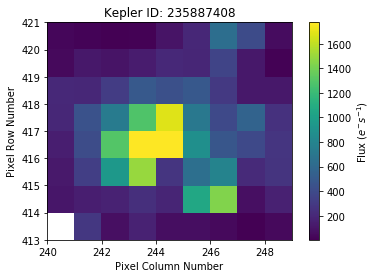

In [5]:
tpf.plot(frame=527, interpolation='nearest')

In [6]:
prf = SimpleKeplerPRF(channel=tpf.channel, shape=tpf.shape[1:], column=tpf.column, row=tpf.row)

In [7]:
scene = SceneModel(prfs=2*[prf])

In [8]:
prior = UniformPrior(lb=[1000, 242, 415, 400, 245, 414, 200],
                    ub=[1000000, 245, 418, 40000, 247, 416, 500])

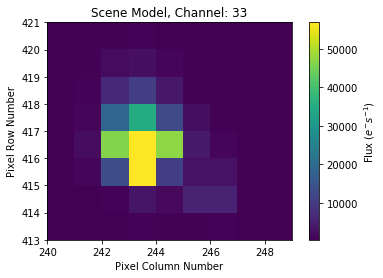

In [9]:
scene.plot(*prior.mean,interpolation='nearest')

In [10]:
phot = PRFPhotometry(scene_model=scene, prior=prior)

In [11]:
tpf.flux_bkg

array([[[      nan, 683.8323 , 683.138  , ..., 680.4155 , 679.7484 ,
         679.0867 ],
        [684.5317 , 683.8331 , 683.14   , ..., 680.422  , 679.756  ,
         679.0954 ],
        [684.5321 , 683.83466, 683.1427 , ..., 680.42914, 679.7643 ,
         679.10486],
        ...,
        [684.53735, 683.8433 , 683.1547 , ..., 680.4548 , 679.7933 ,
         679.1372 ],
        [684.5404 , 683.84753, 683.16003, ..., 680.46466, 679.8043 ,
         679.1494 ],
        [684.5442 , 683.8524 , 683.1661 , ..., 680.4752 , 679.81604,
         679.1623 ]],

       [[      nan, 682.6433 , 681.94904, ..., 679.22687, 678.55994,
         677.89844],
        [683.3435 , 682.64484, 681.9517 , ..., 679.2339 , 678.5681 ,
         677.9078 ],
        [683.3446 , 682.64703, 681.955  , ..., 679.24164, 678.57697,
         677.9177 ],
        ...,
        [683.3519 , 682.6577 , 681.969  , ..., 679.2691 , 678.6078 ,
         677.9519 ],
        [683.3557 , 682.6626 , 681.97504, ..., 679.27966, 678.61945,
   

In [12]:
newtpf = (tpf.flux_bkg + tpf.flux)
print(newtpf)

[[[       nan  954.76105  771.138   ...  732.8061   650.43384  730.9633 ]
  [ 794.60596  805.2998   850.7009  ... 2317.1787   774.97797  872.65063]
  [ 804.84314 1024.581   1741.2666  ... 1462.041    886.04596  968.23694]
  ...
  [ 879.7118   900.6716   881.27637 ...  968.9144   809.5893   768.43915]
  [ 716.20435  783.00574  752.5332  ... 1055.3923   789.67316  683.246  ]
  [ 714.8809   707.0313   650.0819  ... 1349.4662  1123.1714   748.71313]]

 [[       nan  940.1383   777.07477 ...  727.6511   650.24945  732.71185]
  [ 794.2266   805.63385  850.48944 ... 2234.954    764.86554  894.4236 ]
  [ 809.73865 1036.3346  1838.6919  ... 1436.3647   873.41254  975.74194]
  ...
  [ 884.6804   906.31683  881.97473 ...  949.3596   808.4743   763.11255]
  [ 720.24915  778.97943  746.1918  ... 1067.0875   777.93396  685.61383]
  [ 716.3145   712.70605  649.9678  ... 1366.0815  1090.3296   746.8149 ]]

 [[       nan  925.08606  777.86316 ...  722.94727  655.8489   736.79944]
  [ 795.62225  801.084

In [13]:
results = phot.fit(newtpf)

  0%|          | 0/1061 [00:00<?, ?it/s]/anaconda3/lib/python3.6/site-packages/autograd/tracer.py:48: RuntimeWarning: invalid value encountered in log
  return f_raw(*args, **kwargs)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
100%|██████████| 1061/1061 [00:39<00:00, 26.63it/s]


In [14]:
flux_1 = results[:, 0]
xc_1 = results[:, 1]
yc_1 = results[:, 2]
flux_2 = results[:, 3]
xc_2 = results[:, 4]
yc_2 = results[:, 5]
bkg = results[:, -1]

(2830, 2840)

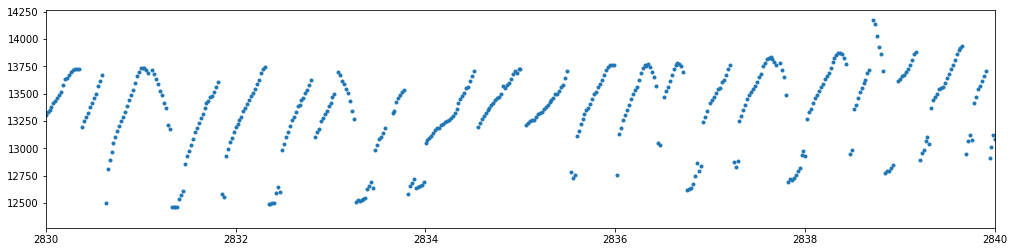

In [15]:
plt.figure(figsize=[17, 4])
plt.plot(tpf.time, flux_1, 'o', markersize=3)
plt.xlim(2830, 2840)

(2830, 2840)

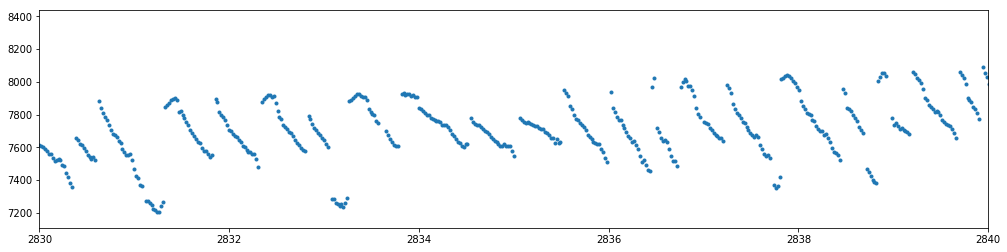

In [16]:
plt.figure(figsize=[17, 4])
plt.plot(tpf.time, flux_2, 'o', markersize=3)
plt.xlim(2830, 2840)

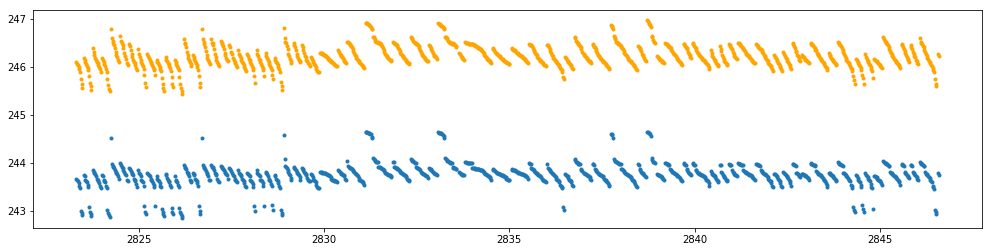

In [17]:
plt.figure(figsize=[17, 4])
plt.plot(tpf.time, xc_1, 'o', markersize=3)
plt.plot(tpf.time, xc_2, 'o', color='orange',markersize=3)

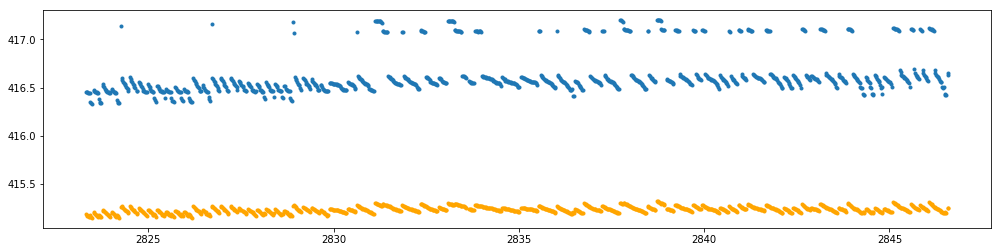

In [18]:
plt.figure(figsize=[17, 4])
plt.plot(tpf.time, yc_1, 'o', markersize=3)
plt.plot(tpf.time, yc_2, 'o', color='orange',markersize=3)

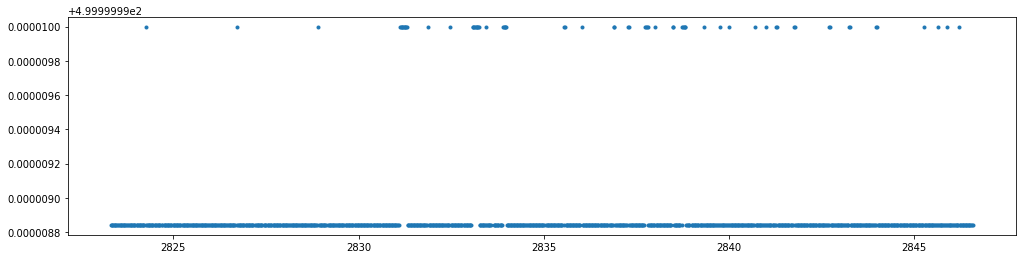

In [19]:
plt.figure(figsize=[17, 4])
plt.plot(tpf.time, bkg, 'o', markersize=3)

In [20]:
lc = tpf.to_lightcurve(aperture_mask='pipeline')

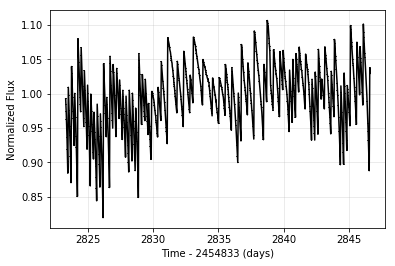

In [21]:
lc.plot()

In [22]:
lc_psf=KeplerLightCurve(time=tpf.time, flux=flux_1, flux_err=lc.flux_err)

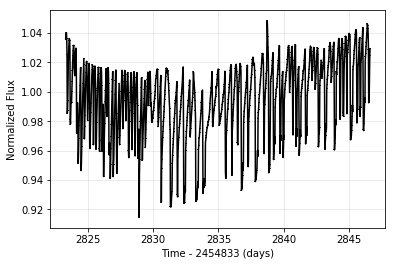

In [23]:
lc_psf.plot()

In [24]:
lc_psf = lc_psf.remove_nans().remove_outliers()

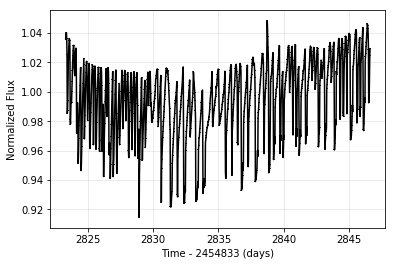

In [25]:
lc_psf.plot()

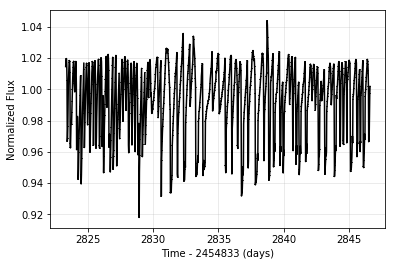

In [26]:
lc_psf.flatten(301).plot()

In [27]:
t = lc_psf.time
y = lc_psf.flux

In [28]:
frequency, power = LombScargle(t,y).autopower(minimum_frequency=0.066, maximum_frequency=20)
1/frequency[np.argmax(power)]

0.24565058972466006

In [29]:
LombScargle(t,y).false_alarm_probability(power.max(), method='bootstrap')

0.13

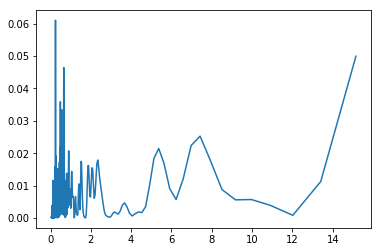

In [30]:
plt.plot(1/frequency, power)

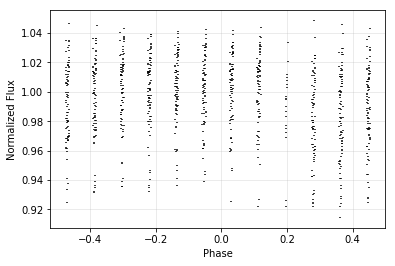

In [31]:
lc_fold = lc_psf.fold(period=0.2451551666917799)
lc_fold.plot(linestyle='none')

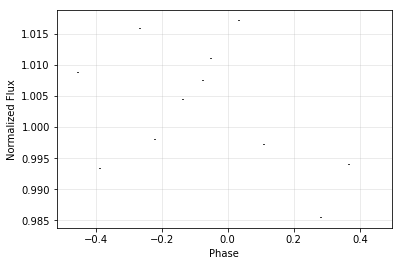

In [32]:
lc_fold.bin(50).plot(linestyle='none')